loading checkpoint from ../models_test/bvae_test_state.tp
loading model...
parameterize optimizer...
loading done


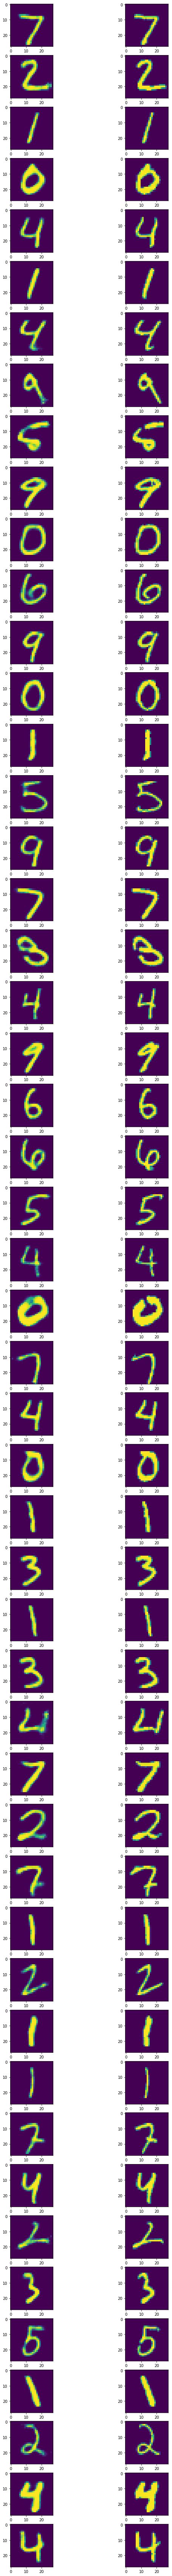

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np

from asr.bvae import bVAE, ConvEncoder, ConvDecoder
from asr.util import save_model, load_model

from torchvision.datasets import MNIST

model = load_model('../models_test','bvae_test')

#loading MNIST
root_dir = '../data/test'
test = MNIST(root=root_dir, download=True, train=False)
# num_train_samples = len(train)
x_test, y_test = test.test_data, test.test_labels
x_test = np.expand_dims(x_test, 1) / 255

num_predictions = 50
predictions = model.predict(x_test[:num_predictions])

rows, cols = num_predictions, 2
f = plt.figure(figsize=(10, 125))
for i in range(rows*cols):
    f.add_subplot(rows, cols, i+1)
    if i % 2 == 0:
        img = predictions[int(i/2)][0, :, :]
    else:
        img = x_test[int(i/2)][0, :, :]
    plt.imshow(img)
plt.show()